## Mini U-Net For Fingernails Segmentation

Jenia Golbstein

In [1]:
%matplotlib inline
from utils_nails import *
#from utils_nails_fined import *

Using TensorFlow backend.
/Users/0frz18064/.local/share/virtualenvs/Fingernails-Segmentation-VraUhc0a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/0frz18064/.local/share/virtualenvs/Fingernails-Segmentation-VraUhc0a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/0frz18064/.local/share/virtualenvs/Fingernails-Segmentation-VraUhc0a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

### Initialization

In [2]:
# initialize instance
dataset = 'nails_augment'
#dataset = 'nails'
seg = fingernailseg(dataset)
# show random example from training set
seg.plot_example(np.random.randint(seg.X_train.__len__()))
# create U-Net model
seg.create_unet()

IsADirectoryError: [Errno 21] Is a directory: 'nails_augment'

In [ ]:
seg.dataset

### PreTraining

In [4]:
if not os.path.exists('unet.h5'):
    print(" no pretrained so train start")
    seg.fit('unet.h5')
# seg.fit('unet.h5')
seg.load_model('unet.h5')

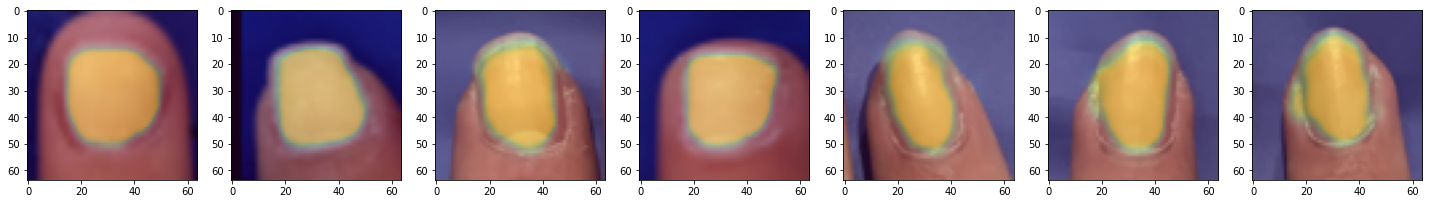

In [5]:
# import pdb;pdb.set_trace()

mask = seg.predict()
raw = seg.X_test
plt.figure(figsize=(25,15))
for i in range(len(mask)):
    plt.subplot(3, 7, i+1)
    plt.imshow(raw[i])
    plt.imshow(mask[i,:,:,0], alpha=0.3)

### FineTuning

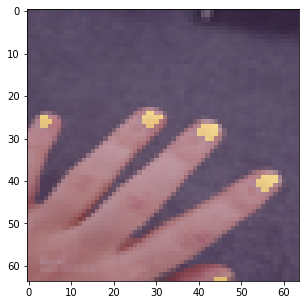

In [6]:
# initialize instance
dataset = 'nails_segmentation'
seg = fingernailseg(dataset)
# show random example from training set
seg.plot_example(np.random.randint(seg.X_train.__len__()))
# create U-Net model
seg.create_unet()
seg.load_model('unet.h5')

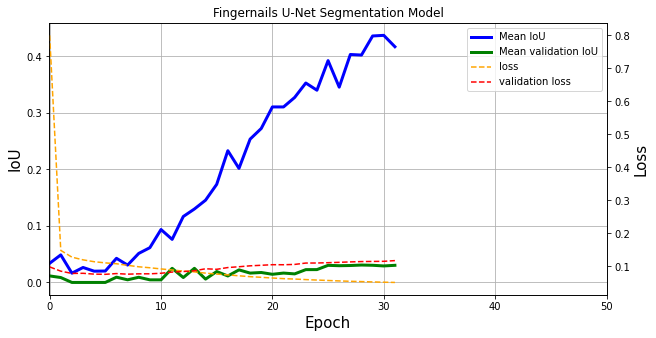

In [ ]:
seg.finetuning_fit('unet_tuned.h5')

In [ ]:
seg.load_model('unet_tuned.h5')

# TEST

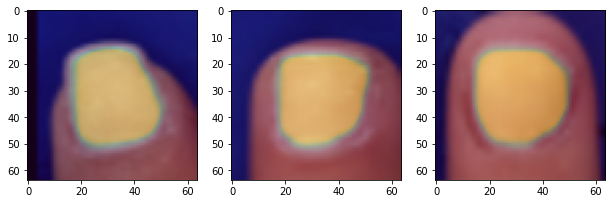

In [6]:
mask = seg.predict()
raw = seg.X_test
plt.figure(figsize=(25,15))
for i in range(len(mask)):
    plt.subplot(3, 7, i+1)
    plt.imshow(raw[i])
    plt.imshow(mask[i,:,:,0], alpha=0.3)

In [7]:
import cv2
img = cv2.imread("IMG_4223.JPG")
img = cv2.resize(img, (192, 160))
img = img[np.newaxis]
img.shape

(1, 160, 192, 3)

In [8]:
mask = seg.inference(img)
plt.figure(figsize=(5,5))

rand_image = np.random.randint(img.__len__())
plt.imshow(img[rand_image,:,:,:])
plt.imshow(mask[rand_image,:,:,0], alpha=0.3)
plt.title('Fingernails segmentation of test image', fontsize=15)

ValueError: Error when checking input: expected input_1 to have shape (64, 64, 3) but got array with shape (160, 192, 3)